<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson28_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# データ準備
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')
df = pd.get_dummies(df, drop_first=True)
X = df.loc[:, df.columns!='price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
# モデル学習
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [4]:
# 予測
model.predict(X_test)

array([ 4323.58386167,  5398.05755102,  5398.05755102, ...,
        8642.23927393, 15110.22501655,  9074.94366197])

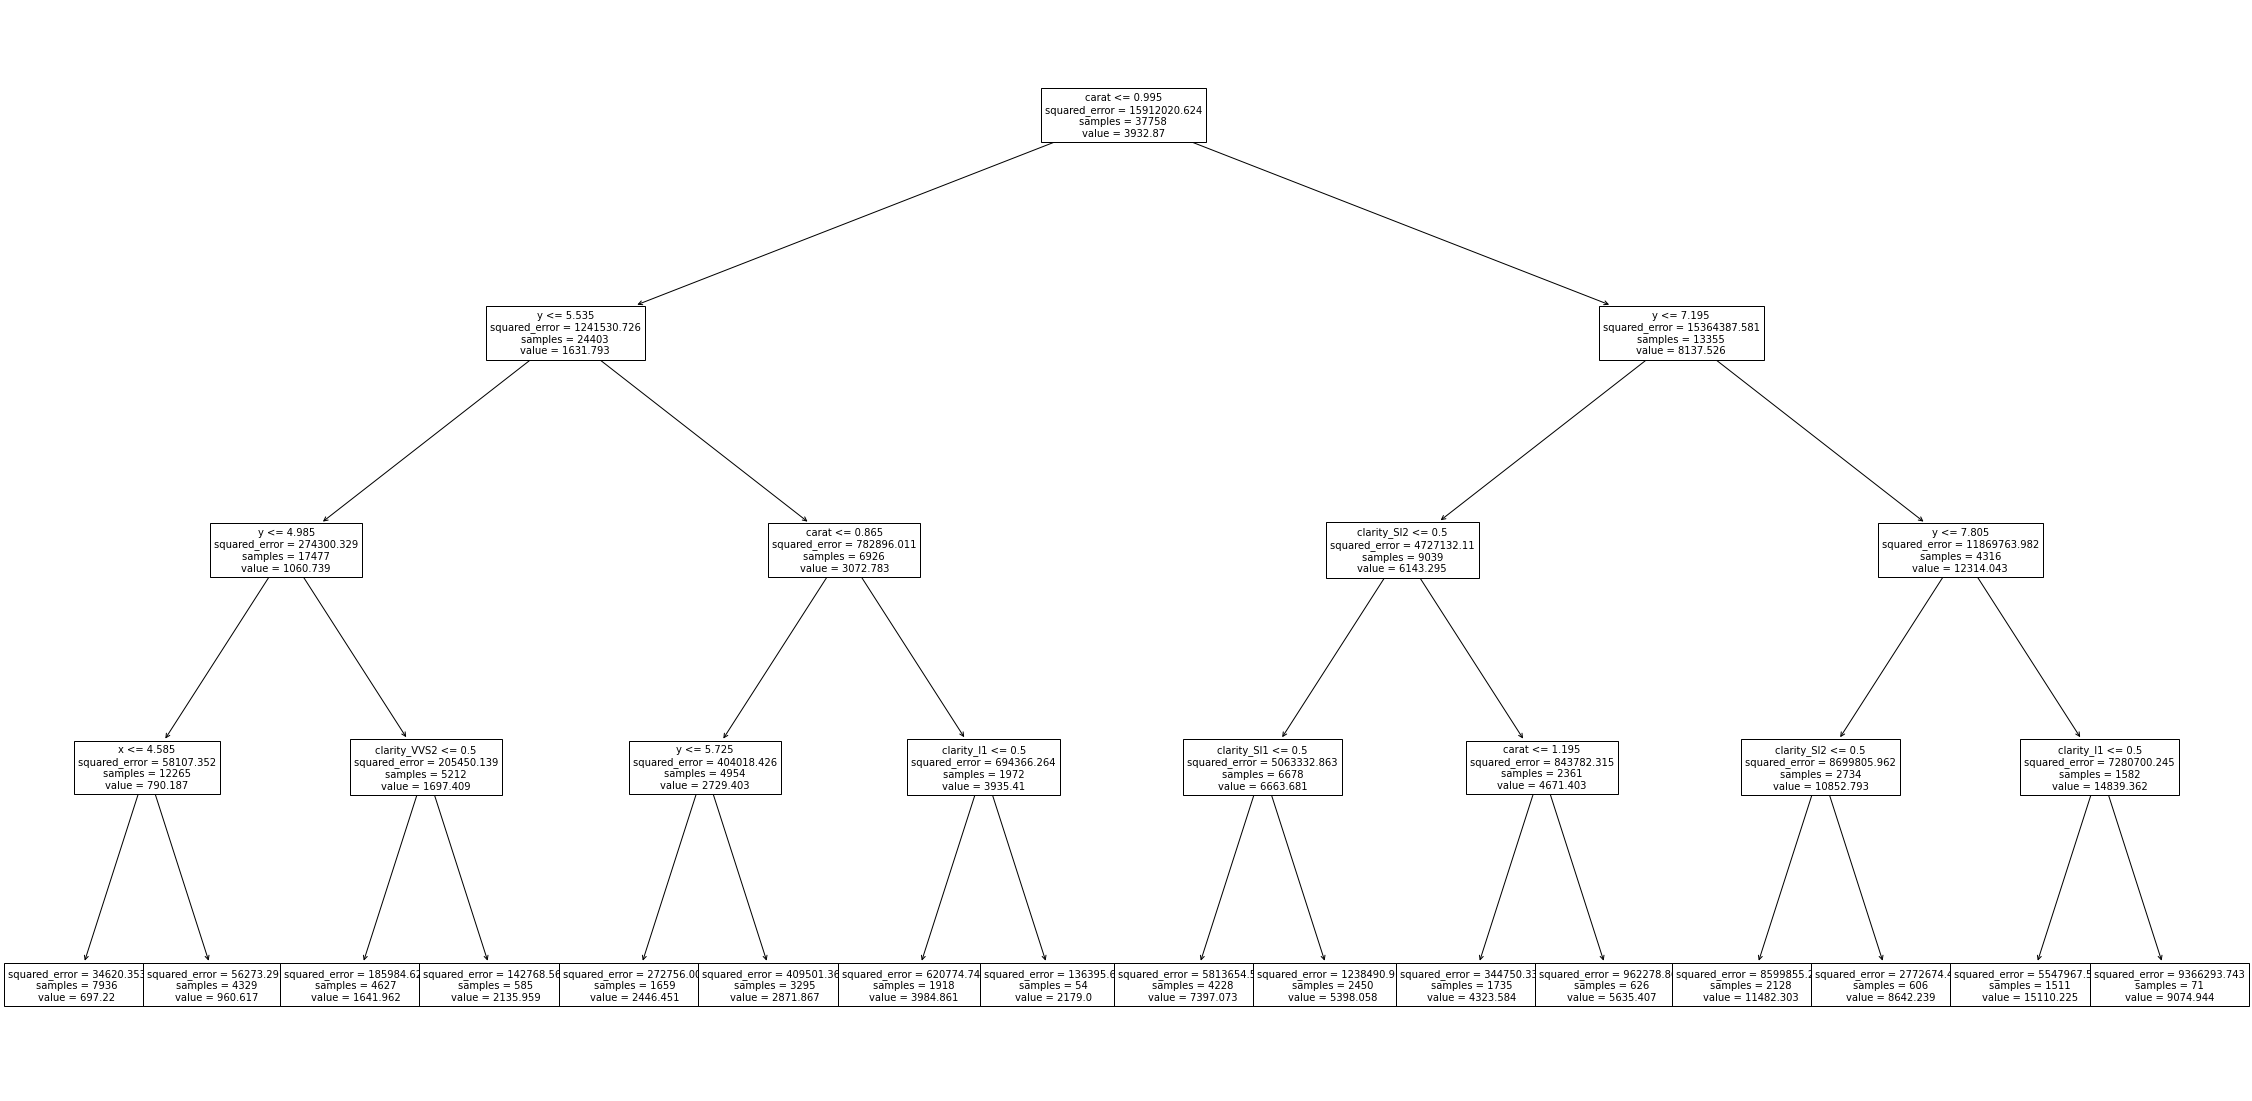

In [5]:
# 樹形図
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=X.columns)

In [6]:
# テキスト表示
print(tree.export_text(model, feature_names=list(X.columns)))

|--- carat <= 1.00
|   |--- y <= 5.54
|   |   |--- y <= 4.98
|   |   |   |--- x <= 4.59
|   |   |   |   |--- value: [697.22]
|   |   |   |--- x >  4.59
|   |   |   |   |--- value: [960.62]
|   |   |--- y >  4.98
|   |   |   |--- clarity_VVS2 <= 0.50
|   |   |   |   |--- value: [1641.96]
|   |   |   |--- clarity_VVS2 >  0.50
|   |   |   |   |--- value: [2135.96]
|   |--- y >  5.54
|   |   |--- carat <= 0.87
|   |   |   |--- y <= 5.72
|   |   |   |   |--- value: [2446.45]
|   |   |   |--- y >  5.72
|   |   |   |   |--- value: [2871.87]
|   |   |--- carat >  0.87
|   |   |   |--- clarity_I1 <= 0.50
|   |   |   |   |--- value: [3984.86]
|   |   |   |--- clarity_I1 >  0.50
|   |   |   |   |--- value: [2179.00]
|--- carat >  1.00
|   |--- y <= 7.19
|   |   |--- clarity_SI2 <= 0.50
|   |   |   |--- clarity_SI1 <= 0.50
|   |   |   |   |--- value: [7397.07]
|   |   |   |--- clarity_SI1 >  0.50
|   |   |   |   |--- value: [5398.06]
|   |   |--- clarity_SI2 >  0.50
|   |   |   |--- carat <= 1.20
